In [1]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b7')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/checkpoints/efficientnet-b7-dcc49843.pth
100.0%


Loaded pretrained weights for efficientnet-b7


In [2]:
model = model.eval()

In [7]:
import json
import torch
from torchvision import transforms

class_idx = json.load(open('imagenet_class_index.json'))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

from PIL import Image
import numpy as np
import requests
from io import BytesIO

tfms = transforms.Compose([transforms.Resize(224), transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])

image = Image.open(BytesIO(requests.get('https://picsum.photos/300').content))
pixel = tfms(image).unsqueeze(0)

idx2label[torch.argmax(torch.softmax(model(pixel.float()), dim=1)).item()]

'steel_arch_bridge'

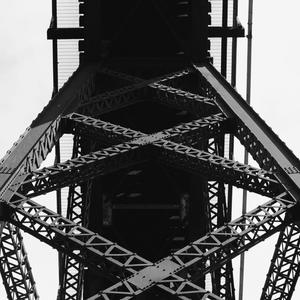

In [8]:
image